## Curve Fitting for Pol, Purity and TCH

We present three different procedures for curves that follow the theoretical non-linear time dependency of Sugar Cane Pol, Purity and Yield.
These curves help to forecast future values, based on observed points

- Pol: Negative Quadratic Polynomial.
- Purity: Hyperbolic Tangent
- TCH: Logistic Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Pol Curve Fitting

##### Quadratic Polynomial in Standard Form:
##### $$y = a \cdot (x-h)^2 + k$$

Where:

- ***a*** is the curvature parameter.
- ***h*** is the horizontal displacement parameter.
- ***k*** is the vertical displacement parameter.

In [2]:
def pol_curve(x, a, h, k):
    return a*(x-h)**2 + k

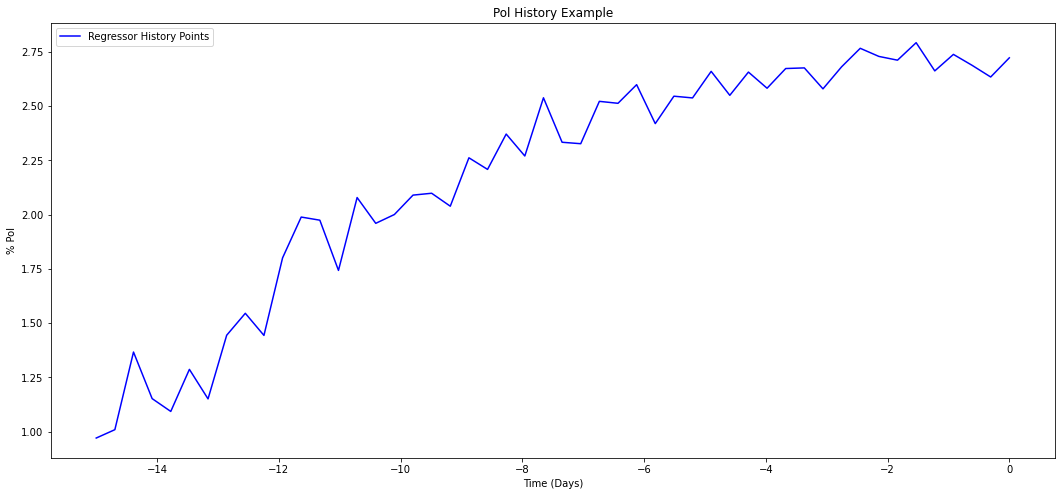

In [3]:
xdata = np.linspace(-15, 0, 50)
y = pol_curve(xdata, -0.01, -1.8, 2.7)
rng = np.random.default_rng()
y_noise = 0.1 * rng.normal(size=xdata.size)
ydata = y + y_noise

plt.figure(figsize = (18,8))
plt.plot(xdata, ydata, 'b-', label='Regressor History Points')
plt.legend()
plt.title("Pol History Example")
plt.xlabel("Time (Days)")
plt.ylabel("% Pol")

plt.show()

To restrict to possible function forms, we limit the curvature parameter **"a"**  to be strictly negative and only in an adequate range for Sugar Cane Pol rates:

In [4]:
# -0.008 < a < 0
popt, pcov = curve_fit(pol_curve, xdata, ydata,bounds=([-0.008,-np.inf,-np.inf],[0,np.inf,np.inf]))
popt

array([-0.008     , -0.34918069,  2.74880517])

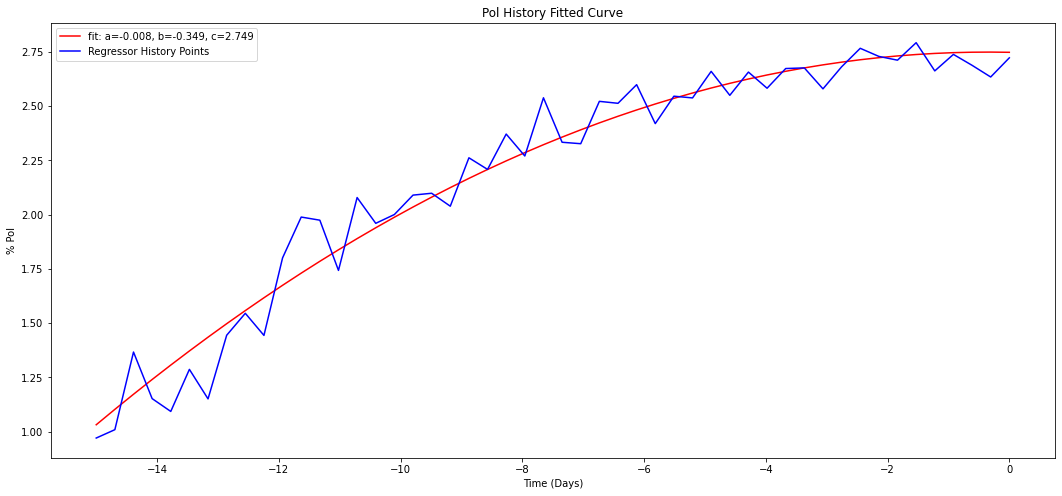

In [5]:
plt.figure(figsize = (18,8))
plt.plot(xdata, pol_curve(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(xdata, ydata, 'b-', label='Regressor History Points')
plt.legend()
plt.title("Pol History Fitted Curve")
plt.xlabel("Time (Days)")
plt.ylabel("% Pol")

plt.show()

### Purity Curve Fitting

##### Hyperbolic Tangent in Standard Form:
##### $$y = a\cdot tanh(b\cdot(x-h)) + k$$

Where:

- ***a*** saturation parameter.
- ***b*** slope parameter.
- ***h*** is the horizontal displacement parameter.
- ***k*** is the vertical displacement parameter.

In [6]:
def purity_curve(x, a, b, h, k):
    return a*np.tanh(b*(x-h))+k

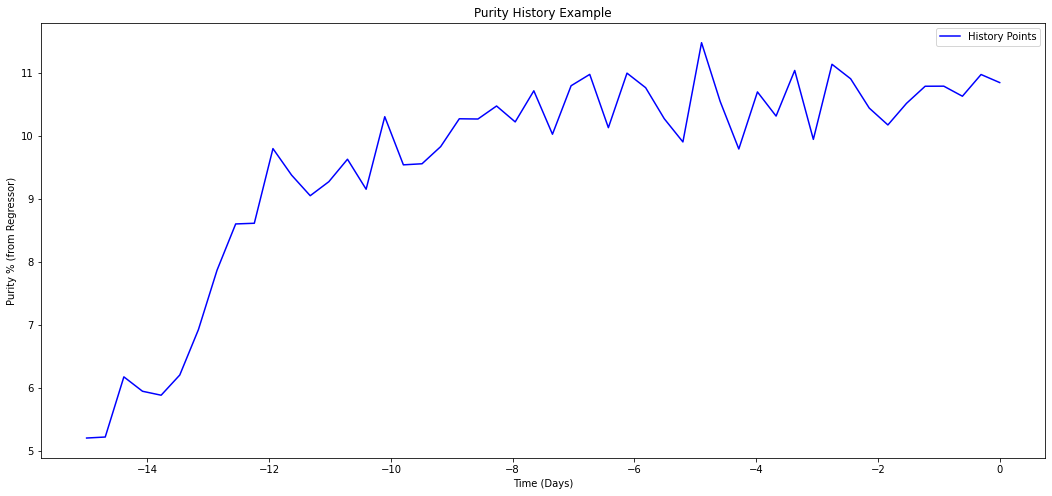

In [7]:
xdata = np.linspace(-15, 0, 50)
y = purity_curve(xdata, 8, 0.25,-16, 2.7)
rng = np.random.default_rng()
y_noise = 0.5 * rng.normal(size=xdata.size)
ydata = y + y_noise

plt.figure(figsize = (18,8))
plt.plot(xdata, ydata, 'b-', label='History Points')
plt.legend()

plt.title("Purity History Example")
plt.xlabel("Time (Days)")
plt.ylabel("Purity % (from Regressor)")

plt.show()

To restrict to possible function forms, we limit the saturation and slope parameters **"a" and "b"**  to be strictly negative and only in an adequate range for Sugar Cane Purity rates:

In [8]:
# a <0, b < 0
popt, pcov = curve_fit(purity_curve, xdata, ydata,bounds=([-np.inf,-np.inf,-np.inf,-np.inf],[0,0,np.inf,np.inf]))
popt

array([ -4.06643074,  -0.32910452, -13.75374883,   6.52458923])

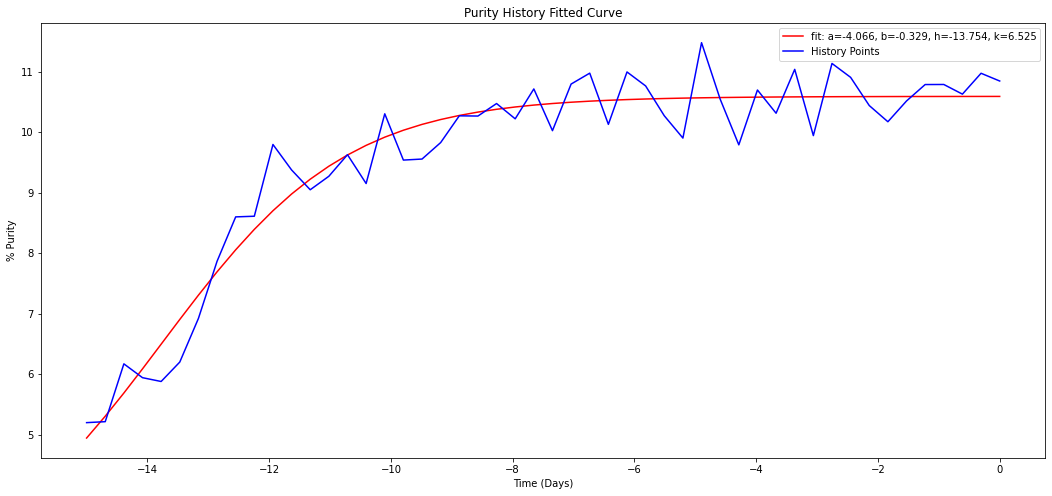

In [9]:
plt.figure(figsize = (18,8))
plt.plot(xdata, purity_curve(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, h=%5.3f, k=%5.3f' % tuple(popt))
plt.plot(xdata, ydata, 'b-', label='History Points')
plt.legend()

plt.title("Purity History Fitted Curve")
plt.xlabel("Time (Days)")
plt.ylabel("% Purity")

plt.show()

### TCH Curve Fitting

##### Logistic Function in Standard Form:
##### $$y = \frac{a}{1+e^{b \cdot (h-x)}} + k$$

Where:

- ***a*** saturation parameter.
- ***b*** slope parameter.
- ***h*** is the horizontal displacement parameter.
- ***k*** is the vertical displacement parameter.

In [10]:
def tch_curve(x, a, b, h, k):
    return a/(1+np.exp(b*(h-x))) + k

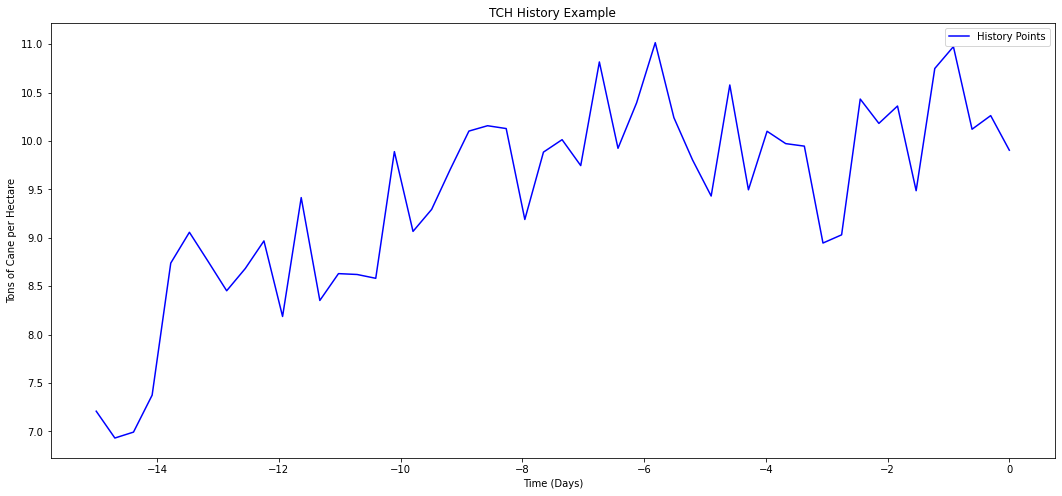

In [11]:
xdata = np.linspace(-15, 0, 50)
y = tch_curve(xdata, 8, 0.25,-16, 2.7)
rng = np.random.default_rng()
y_noise = 0.5 * rng.normal(size=xdata.size)
ydata = y + y_noise

plt.figure(figsize = (18,8))
plt.plot(xdata, ydata, 'b-', label='History Points')
plt.legend()

plt.title("TCH History Example")
plt.xlabel("Time (Days)")
plt.ylabel("Tons of Cane per Hectare")

plt.show()

To restrict to possible function forms, we limit the saturation and slope parameters **"a" and "b"**  to be strictly positive and only in an adequate range for TCH values:

In [12]:
# a > 0, b > 0
popt, pcov = curve_fit(tch_curve, xdata, ydata,bounds=([0,0,-np.inf,-np.inf],np.inf))
popt

array([ 4.99625062e+02,  2.79758098e-01, -3.30624052e+01, -4.89414995e+02])

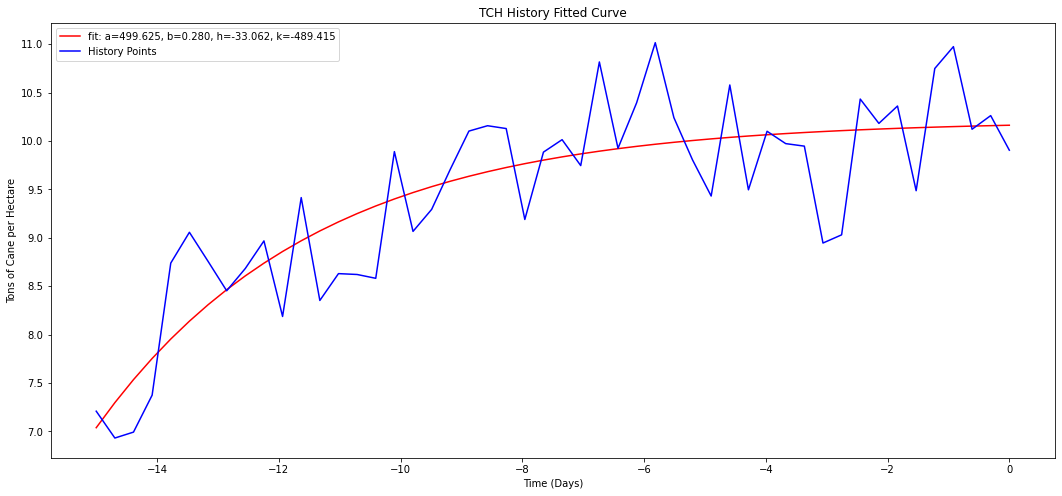

In [13]:
plt.figure(figsize = (18,8))
plt.plot(xdata, tch_curve(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, h=%5.3f, k=%5.3f' % tuple(popt))
plt.plot(xdata, ydata, 'b-', label='History Points')
plt.legend()

plt.title("TCH History Fitted Curve")
plt.xlabel("Time (Days)")
plt.ylabel("Tons of Cane per Hectare")

plt.show()